In the first task we have to implement linear Regression to predict profit for a food truck company. 
# Problem Statement
"Suppose you are the CEO of a
restaurant franchise and are considering dierent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
prots and populations from the cities.
3
You would like to use this data to help you select which city to expand
to next."

In [0]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


We import the neccessary libraries and then we import the data

In [375]:
data = pd.read_csv('https://raw.githubusercontent.com/khuhroproeza/Andrew-sML/master/MLex1LinearRegression/ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Now to get overview of the data we will use the describe function and plot a simple graph to get the hang of the data. This will give us a visualization of how our data looks.

In [376]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


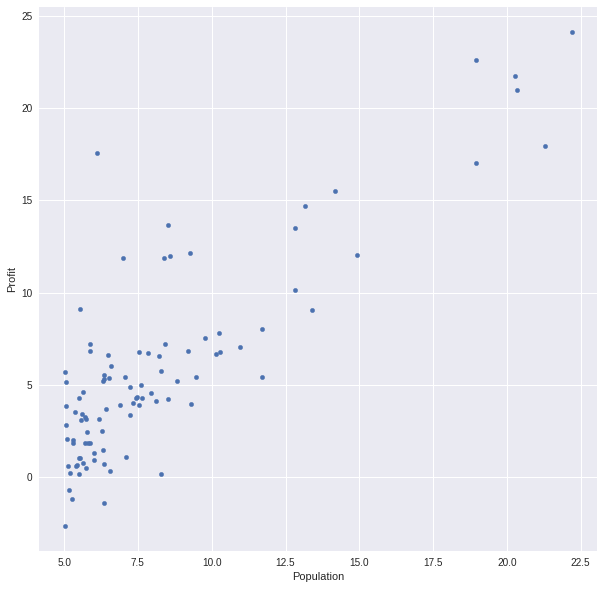

In [377]:
data.plot(kind='scatter', x ='Population', y = 'Profit', figsize=(10,10))

In [0]:

def computeCost(X,y,theta):
  m = len(X)
  av = (2*m)
  thetaT = np.transpose(theta) #creates transpose
  func = np.sum(np.power(((X*thetaT)-y),2))  #np.power raises power to 2 of each element
  return func/av

To insert Y-intercept which is 1 infront of data

In [0]:
data.insert(0,'Y-Intercept',1)

The Equation written above (computeCost Function) is as following:J = (1 / (2*m) ) * sum(((X * theta)-y).^2)

![alt text](https://i.ibb.co/Cs7zWtx/hyptothesis-equation.png)


In [380]:
data.head()


,Y-Intercept,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [0]:
X = data.iloc[:,0:2]

In [382]:
X.head(2)

,Y-Intercept,Population
0,1,6.1101
1,1,5.5277


In [0]:
y = data.iloc[:,2:3]

In [384]:
y.head(2)

,Profit
0,17.5920
1,9.1302


In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [386]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [0]:
Cosz = computeCost(X, y, theta)

In [388]:
print(Cosz)

32.072733877455676


![alt text](https://i.ibb.co/x8nD0wX/descent.png)

In [0]:
def gradientDescent(X,y,theta,alpha, num_iters):
  m = len(X)
  zerox = (num_iters,0)
  
  thetanum = int(theta.shape[1])
  J_history = np.zeros(num_iters)
  

  temp = np.matrix(np.zeros(theta.shape))
  
  for i in range(num_iters):
    error = ((X*theta.T)-y)
    for j in range(thetanum):
      term = np.multiply(error, X[:,j])
      temp[0,j] = theta[0,j] - ((alpha/m) *np.sum(term))
    theta = temp
    J_history[i] = computeCost(X,y,theta)
    
  return theta, J_history

In [0]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [391]:
print(g)

[[-3.24140214  1.1272942 ]]


In [392]:
print(cost[-1])

4.515955503078912


In [0]:
tempx = yupm[0,1]

Text(0.5, 1.0, 'Profit vs Population')

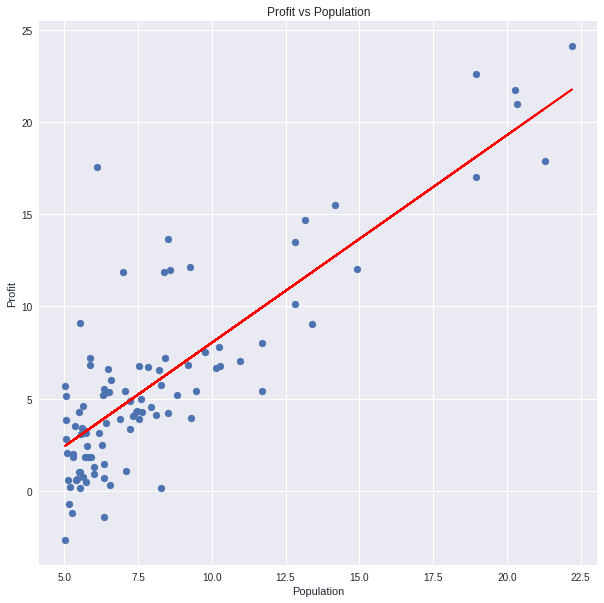

In [394]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data.Population, data.Profit, label='Traning Data')
gradient = g[0,1]
intercept = g[0,0]
x = X[:,1]
A = np.squeeze(np.asarray(x))
y = (gradient*A)+intercept
plt.plot(A, y, '-r')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Profit vs Population')